In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [2]:
# read data from csv file
data = pd.read_csv('headbrain.csv')

In [3]:
data.head()

,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590


In [4]:
# taking head size as independent value(assigned to X) and brain weight as dependent value(assigned to Y)
X = data['Head Size(cm^3)'].values
Y = data['Brain Weight(grams)'].values

In [5]:
X

array([4512, 3738, 4261, 3777, 4177, 3585, 3785, 3559, 3613, 3982, 3443,
       3993, 3640, 4208, 3832, 3876, 3497, 3466, 3095, 4424, 3878, 4046,
       3804, 3710, 4747, 4423, 4036, 4022, 3454, 4175, 3787, 3796, 4103,
       4161, 4158, 3814, 3527, 3748, 3334, 3492, 3962, 3505, 4315, 3804,
       3863, 4034, 4308, 3165, 3641, 3644, 3891, 3793, 4270, 4063, 4012,
       3458, 3890, 4166, 3935, 3669, 3866, 3393, 4442, 4253, 3727, 3329,
       3415, 3372, 4430, 4381, 4008, 3858, 4121, 4057, 3824, 3394, 3558,
       3362, 3930, 3835, 3830, 3856, 3249, 3577, 3933, 3850, 3309, 3406,
       3506, 3907, 4160, 3318, 3662, 3899, 3700, 3779, 3473, 3490, 3654,
       3478, 3495, 3834, 3876, 3661, 3618, 3648, 4032, 3399, 3916, 4430,
       3695, 3524, 3571, 3594, 3383, 3499, 3589, 3900, 4114, 3937, 3399,
       4200, 4488, 3614, 4051, 3782, 3391, 3124, 4053, 3582, 3666, 3532,
       4046, 3667, 2857, 3436, 3791, 3302, 3104, 3171, 3572, 3530, 3175,
       3438, 3903, 3899, 3401, 3267, 3451, 3090, 34

In [6]:
Y

array([1530, 1297, 1335, 1282, 1590, 1300, 1400, 1255, 1355, 1375, 1340,
       1380, 1355, 1522, 1208, 1405, 1358, 1292, 1340, 1400, 1357, 1287,
       1275, 1270, 1635, 1505, 1490, 1485, 1310, 1420, 1318, 1432, 1364,
       1405, 1432, 1207, 1375, 1350, 1236, 1250, 1350, 1320, 1525, 1570,
       1340, 1422, 1506, 1215, 1311, 1300, 1224, 1350, 1335, 1390, 1400,
       1225, 1310, 1560, 1330, 1222, 1415, 1175, 1330, 1485, 1470, 1135,
       1310, 1154, 1510, 1415, 1468, 1390, 1380, 1432, 1240, 1195, 1225,
       1188, 1252, 1315, 1245, 1430, 1279, 1245, 1309, 1412, 1120, 1220,
       1280, 1440, 1370, 1192, 1230, 1346, 1290, 1165, 1240, 1132, 1242,
       1270, 1218, 1430, 1588, 1320, 1290, 1260, 1425, 1226, 1360, 1620,
       1310, 1250, 1295, 1290, 1290, 1275, 1250, 1270, 1362, 1300, 1173,
       1256, 1440, 1180, 1306, 1350, 1125, 1165, 1312, 1300, 1270, 1335,
       1450, 1310, 1027, 1235, 1260, 1165, 1080, 1127, 1270, 1252, 1200,
       1290, 1334, 1380, 1140, 1243, 1340, 1168, 13

In [7]:
# function defining the mean of required value
def total_mean(x):
    return np.mean(x)

In [8]:
X_mean = total_mean(X)          #mean value of X
Y_mean = total_mean(Y)          #mean value of Y


In [9]:
# finding the slope from the formula from all values of x and y
def slope(x,y):
    numerator = 0
    denominator = 0
    for i in range(len(x)):
        numerator += (x[i]-X_mean)*(y[i]-Y_mean)
        denominator += (x[i]-X_mean)**2
    m = numerator/denominator
    return m


In [10]:
# getting the required slope
the_slope = slope(X,Y)

# getting the y intercept
y_intercept = Y_mean-(the_slope*X_mean)

In [11]:
# value finding R_square value
def squared_R(x,y):
    numer, denom = 0, 0
    for i in range(len(x)):
        predicted_y = the_slope*x[i] + y_intercept
        numer += (y[i]-predicted_y)**2
        denom += (y[i] - Y_mean)**2
    r_square = 1-(numer/denom)
    print(r_square)

In [12]:
# plotting the value and line in graph
def plotting(X,Y,final_y):
    plt.scatter(X,Y,color='red')
    plt.plot(X,final_y,color='green',label='Regression line')
    plt.scatter(X_mean,Y_mean,color='blue')
    plt.show()

In [13]:
# predicting y for test value
X_test = 3451
my_custom_prediction = the_slope* X_test + y_intercept
print(my_custom_prediction)

1234.6680716273597


In [14]:
# prediction using sklearn function directly
reg = LinearRegression()
X = X.reshape(-1,1)
Y = Y.reshape(-1,1)
reg.fit(X, Y)
sklearn_prediction = reg.predict([[3451]])
print(sklearn_prediction)

[[1234.66807163]]


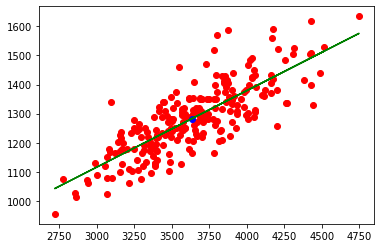

In [15]:
all_predicted_y = the_slope * X+ y_intercept
plotting(X,Y,all_predicted_y)
